In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import os
import random as random
import keras
import glob


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Dense , Flatten , Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
for dirname, _, filenames in os.walk('../dataSurgeryThyroid/tyroidXray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../dataSurgeryThyroid/tyroidXray\thyroid.ipynb
../dataSurgeryThyroid/tyroidXray\tyroidXray.rar
../dataSurgeryThyroid/tyroidXray\.ipynb_checkpoints\thyroid-checkpoint.ipynb
../dataSurgeryThyroid/tyroidXray\test\normal\10_1.jpg
../dataSurgeryThyroid/tyroidXray\test\normal\20_1.jpg
../dataSurgeryThyroid/tyroidXray\test\normal\21_1.jpg
../dataSurgeryThyroid/tyroidXray\test\normal\26_1.jpg
../dataSurgeryThyroid/tyroidXray\test\normal\27_1.jpg
../dataSurgeryThyroid/tyroidXray\test\normal\2_1.jpg
../dataSurgeryThyroid/tyroidXray\test\normal\30_1.jpg
../dataSurgeryThyroid/tyroidXray\test\normal\3_1.jpg
../dataSurgeryThyroid/tyroidXray\test\normal\5_1.jpg
../dataSurgeryThyroid/tyroidXray\test\normal\8_1.jpg
../dataSurgeryThyroid/tyroidXray\test\patient\11_1.jpg
../dataSurgeryThyroid/tyroidXray\test\patient\12_1.jpg
../dataSurgeryThyroid/tyroidXray\test\patient\13_1.jpg
../dataSurgeryThyroid/tyroidXray\test\patient\14_1.jpg
../dataSurgeryThyroid/tyroidXray\test\patient\15_1.jpg
../dataSurgeryThy

In [20]:
train_path = "../dataSurgeryThyroid/tyroidXray/train/"
val_path = "../dataSurgeryThyroid/tyroidXray/val/"
test_path = "../dataSurgeryThyroid/tyroidXray/test/"

base_dir  = '../dataSurgeryThyroid/tyroidXray/train'
cate = os.listdir(base_dir)

#import the filw
image_size =100
data_array = []
for i in cate:
    path_ = os.path.join(base_dir , i)   
    label = cate.index(i)
    for img_name in os.listdir(path_):
        img_path = os.path.join(path_ , img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img , (image_size , image_size))
        data_array.append([img , label])

#shuflling and splitting
np.random.shuffle(data_array)
x_train=[]
y_train=[]
for x_val , y_val in data_array:
    x_train.append(x_val)
    y_train.append(y_val)
x_train=np.array(x_train)
y_train=np.array(y_train)
del(data_array)


base_dir_test = "../dataSurgeryThyroid/tyroidXray/test/"
cate = os.listdir(base_dir_test)
data_array_test = []
for i in cate:
    path_ = os.path.join(base_dir_test , i)
    label = cate.index(i)
    for img_name in os.listdir(path_):
        img_path = os.path.join(path_ , img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img , (image_size , image_size))
        data_array_test.append([img , label])

np.random.shuffle(data_array_test)
x_test=[]
y_test=[]
for x_val , y_val in data_array_test:
    x_test.append(x_val)
    y_test.append(y_val)
x_test=np.array(x_test)
y_test=np.array(y_test)
del(data_array_test)



base_dir_val  = "../dataSurgeryThyroid/tyroidXray/test/"
cate = os.listdir(base_dir_val)
data_array_val = []
for i in cate:
    path_ = os.path.join(base_dir_val , i)   
    label = cate.index(i)
    for img_name in os.listdir(path_):
        img_path = os.path.join(path_ , img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img , (image_size , image_size))
        data_array_val.append([img , label])
        
np.random.shuffle(data_array_val)
x_val=[]
y_val=[]
for x_val_ , y_val_ in data_array_val:
    x_val.append(x_val_)
    y_val.append(y_val_)
    
x_val=np.array(x_val)
y_val=np.array(y_val)
del(data_array_val)

print('Test',  x_test.shape)
print('Train', x_train.shape)
print('Val', x_val.shape)

Test (30, 100, 100, 3)
Train (90, 100, 100, 3)
Val (30, 100, 100, 3)


<AxesSubplot:>

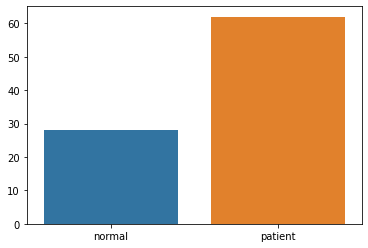

In [21]:
normal = glob.glob(train_path+"normal/*.jpg")
patient = glob.glob(train_path+"patient/*.jpg")

plt.show('normal')
sns.barplot(x=["normal","patient"],y=[len(normal),len(patient)])

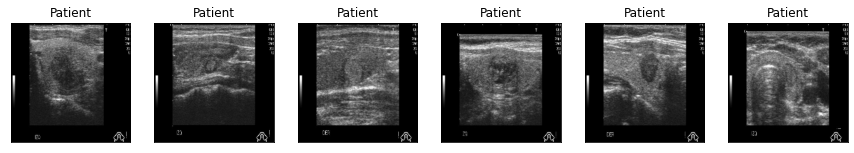

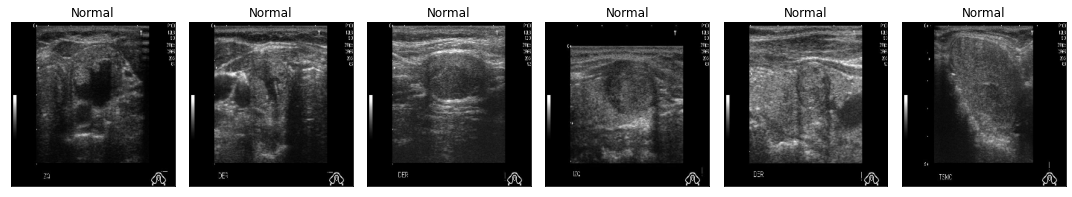

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(patient[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.set_title("Patient")
    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal[i])
    img = cv2.resize(img, (220,220))
    ax.imshow(img)
    ax.set_title("Normal")
fig.tight_layout()    
plt.show()

Model Training

In [23]:
pretrained_model = tf.keras.applications.DenseNet121(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model.trainable = False


inputs_densenet  = pretrained_model.input
fc_l  = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
op_l = tf.keras.layers.Dense(1, activation='sigmoid')(fc_l)
model = tf.keras.Model(inputs=inputs_densenet , outputs=op_l)
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 106, 106, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 50, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [24]:
his=model.fit(x_train, y_train, validation_data=(x_val , y_val),  steps_per_epoch=10, epochs=10,  class_weight={0:1 , 1:4})

Epoch 1/10
10/10 [==============================] - 3s 321ms/step - loss: 11.1069 - accuracy: 0.6222 - val_loss: 11.7955 - val_accuracy: 0.6667
Epoch 2/10
10/10 [==============================] - 2s 154ms/step - loss: 5.4723 - accuracy: 0.6889 - val_loss: 1.2050 - val_accuracy: 0.6667
Epoch 3/10
10/10 [==============================] - 2s 156ms/step - loss: 2.1210 - accuracy: 0.7000 - val_loss: 1.8105 - val_accuracy: 0.6667
Epoch 4/10
10/10 [==============================] - 2s 153ms/step - loss: 1.0493 - accuracy: 0.7444 - val_loss: 0.9122 - val_accuracy: 0.6667
Epoch 5/10
10/10 [==============================] - 2s 165ms/step - loss: 1.0085 - accuracy: 0.7444 - val_loss: 2.5687 - val_accuracy: 0.6667
Epoch 6/10
10/10 [==============================] - 2s 153ms/step - loss: 1.0673 - accuracy: 0.7778 - val_loss: 1.2591 - val_accuracy: 0.6667
Epoch 7/10
10/10 [==============================] - 2s 166ms/step - loss: 0.8373 - accuracy: 0.7444 - val_loss: 0.5937 - val_accuracy: 0.7000
Epoc

              precision    recall  f1-score   support

           0       0.50      0.10      0.17        10
           1       0.68      0.95      0.79        20

    accuracy                           0.67        30
   macro avg       0.59      0.53      0.48        30
weighted avg       0.62      0.67      0.58        30



<AxesSubplot:>

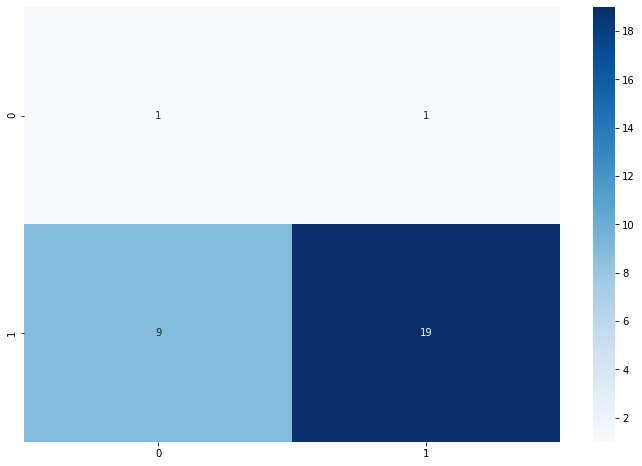

In [25]:
pred = model.predict(x_test)
pred = pred>0.5
print(classification_report(y_test,pred))
conf = confusion_matrix(pred , y_test)
plt.figure(figsize=(12,8))
sns.heatmap(conf , annot=True, cmap='Blues')

In [26]:
'''history_df.loc[1:, ['loss', 'val_loss']].plot()
history_df.loc[1:, ['accuracy', 'val_accuracy']].plot()
history_df.loc[1:, ['auc', 'val_auc']].plot()'''

"history_df.loc[1:, ['loss', 'val_loss']].plot()\nhistory_df.loc[1:, ['accuracy', 'val_accuracy']].plot()\nhistory_df.loc[1:, ['auc', 'val_auc']].plot()"

Model Creation

In [27]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 106, 106, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 50, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [28]:
history_df = pd.DataFrame(history.history)

NameError: name 'history' is not defined

In [ ]:

results = model.evaluate(test)